## 📦 1. Data Loading & Inspection

In [175]:
# 📦 1. DATA LOADING & INSPECTION
# --------------------------------
# ✅ Common Imports
import pandas as pd  # For data loading
import numpy as np   # For numerical operations


In [176]:
# 📥 Load from CSV
df = pd.read_csv('filename.csv')

# Alternative: specify delimiter (e.g. tabs, semicolons)
df = pd.read_csv('filename.csv', delimiter='\t')      # Tab-separated
df = pd.read_csv('filename.csv', sep=';')             # Semicolon-separated

# If file has no header row:
df = pd.read_csv('filename.csv', header=None)

# Only read specific columns:
# df = pd.read_csv('filename.csv', usecols=['Col1', 'Col2'])


In [177]:
# 📥 Load from Excel
# df = pd.read_excel('filename.xlsx')                   # First sheet by default
# df = pd.read_excel('filename.xlsx', sheet_name='DataSheet')  # Specify sheet


In [178]:
# 📥 Load from SQL database
import sqlite3

conn = sqlite3.connect('database.db')
# df = pd.read_sql_query("SELECT * FROM table_name", conn)


In [179]:
# 📥 Load from clipboard (quick test with Excel/CSV selection)
df = pd.read_clipboard()  # Paste copied table directly into DataFrame


In [180]:
# 📥 Manual creation from dictionary or array
df = pd.DataFrame({
    'Name': ['Alice', 'Bob'],
    'Age': [25, 30]
})

# Or from list of records
df = pd.DataFrame([
    {'Name': 'Alice', 'Age': 25},
    {'Name': 'Bob', 'Age': 30}
])

## 🧼 2. Handling Missing Data

In [181]:
# 🧼 2. HANDLING MISSING VALUES
# -------------------------------
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer

# 🧪 Sample DataFrame (with missing values for demo)
data = {
    'Present_Price': [5.0, np.nan, 7.2, 4.4, np.nan],
    'Kms_Driven': [27000, 43000, np.nan, 5200, 42450],
    'Fuel_Type': ['Petrol', np.nan, 'Diesel', 'Petrol', np.nan]
}

df = pd.DataFrame(data)
df.head()


,Present_Price,Kms_Driven,Fuel_Type
0,5.0,27000.0,Petrol
1,NaN,43000.0,NaN
2,7.2,NaN,Diesel
3,4.4,5200.0,Petrol
4,NaN,42450.0,NaN


In [182]:
# 🕵️ Detecting missing values
df.isnull().sum()         # Count missing per column
df.isnull().any()         # Boolean flags
df.isnull().mean()        # Percentage missing
df[df.isnull().any(axis=1)]  # Rows with any missing values


,Present_Price,Kms_Driven,Fuel_Type
1,NaN,43000.0,NaN
2,7.2,NaN,Diesel
4,NaN,42450.0,NaN


In [183]:
# ❌ Dropping missing data (not always recommended)
df_dropped_rows = df.dropna()         # Drop rows with any missing
df_dropped_cols = df.dropna(axis=1)   # Drop columns with any missing


In [184]:
# ✅ Fill missing manually
df_manual_fill = df.copy()
df_manual_fill['Present_Price'].fillna(df['Present_Price'].mean(), inplace=True)
df_manual_fill['Fuel_Type'].fillna('Petrol', inplace=True)


/tmp/ipykernel_527535/2519718393.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_manual_fill['Present_Price'].fillna(df['Present_Price'].mean(), inplace=True)
/tmp/ipykernel_527535/2519718393.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

### ▸ Simple Imputer



In [185]:
# 🧠 SimpleImputer
df_si = df.copy()

imp_mean = SimpleImputer(strategy='mean')  # For numeric
df_si[['Present_Price']] = imp_mean.fit_transform(df_si[['Present_Price']])

imp_freq = SimpleImputer(strategy='most_frequent')  # For categorical
df_si[['Fuel_Type']] = imp_freq.fit_transform(df_si[['Fuel_Type']])


### ▸ KNN Imputer

In [186]:
# 🤖 KNNImputer (numeric only)
df_knn = df.copy()
df_knn_numeric = df_knn.select_dtypes(include='number')

knn_imp = KNNImputer(n_neighbors=2)
df_knn_imputed = pd.DataFrame(
    knn_imp.fit_transform(df_knn_numeric),
    columns=df_knn_numeric.columns
)


## 🔍 3. Outlier Detection & Removal

In [187]:
# 🔍 3. OUTLIER DETECTION & REMOVAL
# -----------------------------------
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.cluster import DBSCAN
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

# 🧪 Sample DataFrame with numeric values
data = {
    'Price': [10, 12, 11, 13, 12, 50, 11, 10, 12, 11],
    'Mileage': [20000, 22000, 21000, 23000, 25000, 50000, 24000, 21000, 20000, 20500]
}

df = pd.DataFrame(data)
print(df)


   Price  Mileage
0     10    20000
1     12    22000
2     11    21000
3     13    23000
4     12    25000
5     50    50000
6     11    24000
7     10    21000
8     12    20000
9     11    20500


### ▸ Interquartile Range (IQR)


In [188]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# ✅ Filter out the outliers
df_iqr = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


### ▸ Z-Score Method


In [189]:
# Standardize and filter
df_zscore = df[(np.abs(zscore(df)) < 3).all(axis=1)]


### ▸ Isolation Forest


In [190]:
iso = IsolationForest(contamination=0.1, random_state=42)
outliers = iso.fit_predict(df)

# Keep only normal rows (label 1)
df_iforest = df[outliers == 1]


### ▸ Local Outlier Factor (LOF)


In [191]:
lof = LocalOutlierFactor(n_neighbors=5)
labels = lof.fit_predict(df)

df_lof = df[labels == 1]  # LOF: 1 = inlier, -1 = outlier


### ▸ Elliptic Envelope


In [192]:
elliptic = EllipticEnvelope()
labels = elliptic.fit_predict(df)

df_elliptic = df[labels == 1]  # 1 = inlier, -1 = outlier


### ▸ DBSCAN (Outlier Detection)

In [193]:
# Detects outliers as points not belonging to any dense cluster
db = DBSCAN(eps=1000, min_samples=2)  # eps = neighborhood size, min_samples = minimum points in cluster
labels = db.fit_predict(df)

df_dbscan = df[labels != -1]  # -1 = noise/outlier


## 🧠 4. Feature Engineering

In [194]:
# 🧠 4. FEATURE ENGINEERING
# ---------------------------
import pandas as pd
import numpy as np

# 🧪 Sample DataFrame
data = {
    'Year': [2014, 2013, 2017, 2011, 2014],
    'Present_Price': [5.59, 9.54, 9.85, 4.15, 6.87],
    'Kms_Driven': [27000, 43000, 6900, 5200, 42450],
    'Fuel_Type': ['Petrol', 'Diesel', 'Petrol', 'Petrol', 'Diesel'],
    'Seller_Type': ['Dealer', 'Dealer', 'Dealer', 'Dealer', 'Dealer'],
    'Transmission': ['Manual', 'Manual', 'Manual', 'Manual', 'Manual'],
    'Owner': [0, 0, 0, 0, 0]
}

df = pd.DataFrame(data)


In [195]:
# Derive 'Age' from 'Year'
maxYear = df['Year'].max()
df['Age'] = maxYear + 1 - df['Year']

# Drop 'Year' if 'Age' is used instead
df.drop(columns='Year', inplace=True)


In [196]:
# Drop columns not useful for modeling (e.g., names or IDs)
df = df.drop(columns=['Fuel_Type'])  # only if already encoded


In [197]:
# Define feature groups by data type or role
X_num = ['Present_Price', 'Kms_Driven', 'Age']
X_cat = ['Seller_Type', 'Transmission']
y = ['Owner']  # example target


In [198]:
# You can drop low-variance columns or highly correlated features if needed
# df = df.drop(columns=['SomeIrrelevantColumn'])


### ▸ Dropping Columns
### ▸ Creating Derived Features
### ▸ Feature Selection (if applicable)

## 🧱 5. Categorical Encoding

In [199]:
# 🧱 5. CATEGORICAL ENCODING
# ---------------------------
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# 🧪 Sample DataFrame
df = pd.DataFrame({
    'Fuel_Type': ['Petrol', 'Diesel', 'Petrol', 'CNG', 'Diesel'],
    'Transmission': ['Manual', 'Automatic', 'Manual', 'Manual', 'Automatic'],
    'Education': ['High School', 'Diploma', 'Bachelor', 'Diploma', 'Bachelor']
})


### ▸ One-Hot Encoding (`pd.get_dummies`)


In [200]:
# Encodes categories as separate columns (1 or 0)
df_dummies = pd.get_dummies(df, drop_first=True)  # drop_first=True to avoid multicollinearity


### ▸ Scikit-learn OneHotEncoder


In [201]:
ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded_array = ohe.fit_transform(df[['Fuel_Type']])

# Convert back to DataFrame
df_ohe = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(['Fuel_Type']))


### ▸ Ordinal Encoding

In [202]:
# Ordered education levels
ordered_edu = ['High School', 'Diploma', 'Bachelor']

ordinal = OrdinalEncoder(categories=[ordered_edu])
df['Education_encoded'] = ordinal.fit_transform(df[['Education']])


## 📏 6. Feature Scaling & Transformation

In [203]:
# 📏 6. FEATURE SCALING & TRANSFORMATION
# ---------------------------------------
import pandas as pd
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler,
    QuantileTransformer, PowerTransformer
)

# 🧪 Sample DataFrame
df = pd.DataFrame({
    'Present_Price': [5.59, 9.54, 9.85, 4.15, 6.87],
    'Kms_Driven': [27000, 43000, 6900, 5200, 42450],
    'Owner': [0, 0, 0, 0, 0]
})


### ▸ StandardScaler


In [204]:
scaler = StandardScaler()
scaled_std = scaler.fit_transform(df)

df_std = pd.DataFrame(scaled_std, columns=df.columns)


### ▸ MinMaxScaler


In [205]:
scaler = MinMaxScaler()
scaled_minmax = scaler.fit_transform(df)

df_minmax = pd.DataFrame(scaled_minmax, columns=df.columns)


### ▸ RobustScaler


In [206]:
scaler = RobustScaler()
scaled_robust = scaler.fit_transform(df)

df_robust = pd.DataFrame(scaled_robust, columns=df.columns)


### ▸ MaxAbsScaler


In [207]:
scaler = MaxAbsScaler()
scaled_maxabs = scaler.fit_transform(df)

df_maxabs = pd.DataFrame(scaled_maxabs, columns=df.columns)

### ▸ QuantileTransformer

In [208]:
qt = QuantileTransformer(output_distribution='normal', random_state=42)
scaled_qt = qt.fit_transform(df)

df_qt = pd.DataFrame(scaled_qt, columns=df.columns)


/home/zeldean/Second-Brain/{20} Bachelor of Computing/3 Year/MLG382/Code/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (5). n_quantiles is set to n_samples.
  warnings.warn(


### ▸ PowerTransformer


#### ▸ Yeo-Johnson


In [209]:
# Yeo-Johnson works with 0 and negative values
pt_yeo = PowerTransformer(method='yeo-johnson')
df_yeo = pd.DataFrame(pt_yeo.fit_transform(df), columns=df.columns)


#### ▸ Box-Cox (positive only)

In [210]:

# # Box-Cox only for strictly positive data
# pt_box = PowerTransformer(method='box-cox')
# df_positive = df[df > 0]  # Ensure all values > 0
# df_box = pd.DataFrame(pt_box.fit_transform(df_positive), columns=df.columns)


## 📐 7. Data Splitting

In [211]:
# 📐 7. DATA SPLITTING
# ---------------------
from sklearn.model_selection import train_test_split
import pandas as pd

# 🧪 Sample DataFrame (features + target)
df = pd.DataFrame({
    'Present_Price': [5.59, 9.54, 9.85, 4.15, 6.87],
    'Kms_Driven': [27000, 43000, 6900, 5200, 42450],
    'Age': [9, 10, 6, 12, 9],
    'Selling_Price': [3.35, 4.75, 7.25, 2.85, 4.60]  # target
})

# Split features and target
X = df.drop(columns='Selling_Price')   # Features
y = df['Selling_Price']                # Target


### ▸ Train-Test Split

In [212]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 🤖 8. Model Training


### 🔹 Regression Models


#### ▸ Linear Regression


In [213]:
# 🤖 8A. LINEAR REGRESSION
# -------------------------
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)  # Train the model
y_pred = model_lr.predict(X_test)  # Predict on test set


In [214]:
# 🤖 8B. POLYNOMIAL REGRESSION
# -----------------------------
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)  # degree=2 for quadratic
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_poly_pred = model_poly.predict(X_test_poly)


In [215]:
# 🤖 8C. DECISION TREE REGRESSOR
# -------------------------------
from sklearn.tree import DecisionTreeRegressor

model_dtr = DecisionTreeRegressor(max_depth=4, random_state=42)
model_dtr.fit(X_train, y_train)
y_tree_pred = model_dtr.predict(X_test)


In [216]:
# 🤖 8D. RANDOM FOREST REGRESSOR
# -------------------------------
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_rf_pred = model_rf.predict(X_test)


In [217]:
# 🤖 8E. SUPPORT VECTOR REGRESSOR (SVR)
# -------------------------------------
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# SVR needs scaled features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_svr = SVR(kernel='rbf')
model_svr.fit(X_train_scaled, y_train)
y_svr_pred = model_svr.predict(X_test_scaled)


In [218]:
# 🤖 8F. ARTIFICIAL NEURAL NETWORK (Keras)
# -----------------------------------------
from keras.models import Sequential
from keras.layers import Dense

model_ann = Sequential()
model_ann.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
model_ann.add(Dense(5, activation='relu'))
model_ann.add(Dense(1))  # Single output (regression)

model_ann.compile(optimizer='adam', loss='mse')
model_ann.fit(X_train, y_train, epochs=100, verbose=0, validation_split=0.2)

y_ann_pred = model_ann.predict(X_test)


/home/zeldean/Second-Brain/{20} Bachelor of Computing/3 Year/MLG382/Code/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


### 🔸 Classification Models


In [219]:
import numpy as np

# Add fake binary classification target (0 = Manual, 1 = Automatic)
df['Transmission'] = np.random.choice([0, 1], size=len(df))

# Now set it as the classification target
X = df.drop(columns='Transmission')
y_class = df['Transmission']


In [220]:
y_class = df['Transmission']
# .map({'Manual': 0, 'Automatic': 1})  # Binary target


In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)


In [222]:
# 🤖 8B1. LOGISTIC REGRESSION
# ---------------------------
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression()
model_log.fit(X_train, y_train)
y_log_pred = model_log.predict(X_test)


/home/zeldean/Second-Brain/{20} Bachelor of Computing/3 Year/MLG382/Code/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [223]:
# 🤖 8B2. DECISION TREE CLASSIFIER
# --------------------------------
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
model_tree.fit(X_train, y_train)
y_tree_pred = model_tree.predict(X_test)


In [224]:
# 🤖 8B3. RANDOM FOREST CLASSIFIER
# --------------------------------
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_rf_pred = model_rf.predict(X_test)


In [225]:
# 🤖 8B4. SUPPORT VECTOR MACHINE (SVC)
# -------------------------------------
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# SVC needs scaled input
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_svc = SVC(kernel='linear')
model_svc.fit(X_train_scaled, y_train)
y_svc_pred = model_svc.predict(X_test_scaled)


In [226]:
# 🤖 8B5. K-NEAREST NEIGHBORS CLASSIFIER
# ---------------------------------------
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)
y_knn_pred = model_knn.predict(X_test)


In [227]:
# 🤖 8B6. ARTIFICIAL NEURAL NETWORK (Keras, Classification)
# ----------------------------------------------------------
from keras.models import Sequential
from keras.layers import Dense

model_ann = Sequential()
model_ann.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
model_ann.add(Dense(5, activation='relu'))
model_ann.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary

model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_ann.fit(X_train, y_train, epochs=100, verbose=0, validation_split=0.2)

y_ann_pred = (model_ann.predict(X_test) > 0.5).astype(int)  # threshold for class


/home/zeldean/Second-Brain/{20} Bachelor of Computing/3 Year/MLG382/Code/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


### 🔘 Clustering Models


In [228]:
# 🤖 8C. CLUSTERING MODELS
# --------------------------
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt

# 🧪 Sample Data (2D for visualization)
df = pd.DataFrame({
    'Price': [5.0, 5.2, 5.3, 7.5, 8.0, 7.8, 15.0, 15.2, 16.0],
    'Mileage': [20000, 21000, 20500, 40000, 42000, 41000, 60000, 59000, 62000]
})


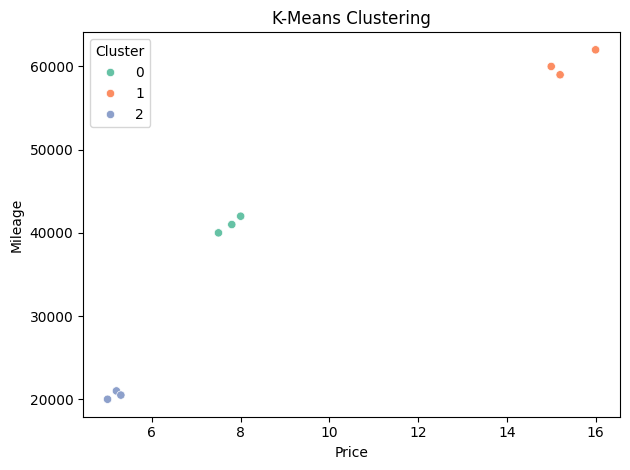

Inertia: 7166667.4


In [229]:
# Cluster into 3 groups
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Price', 'Mileage']])

# Plot the result
sns.scatterplot(data=df, x='Price', y='Mileage', hue='Cluster', palette='Set2')
plt.title('K-Means Clustering')
plt.tight_layout()
plt.show()

# 📌 Inertia (total within-cluster distance)
print("Inertia:", kmeans.inertia_)  # Lower is better (used for elbow method)


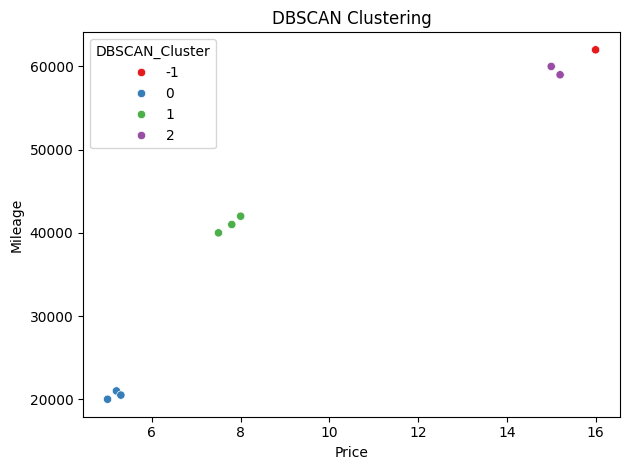

In [230]:
# eps = radius of neighborhood, min_samples = minimum points in cluster
dbscan = DBSCAN(eps=1500, min_samples=2)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df[['Price', 'Mileage']])

# Plot DBSCAN result
sns.scatterplot(data=df, x='Price', y='Mileage', hue='DBSCAN_Cluster', palette='Set1')
plt.title('DBSCAN Clustering')
plt.tight_layout()
plt.show()

# 📌 -1 means noise (outlier)


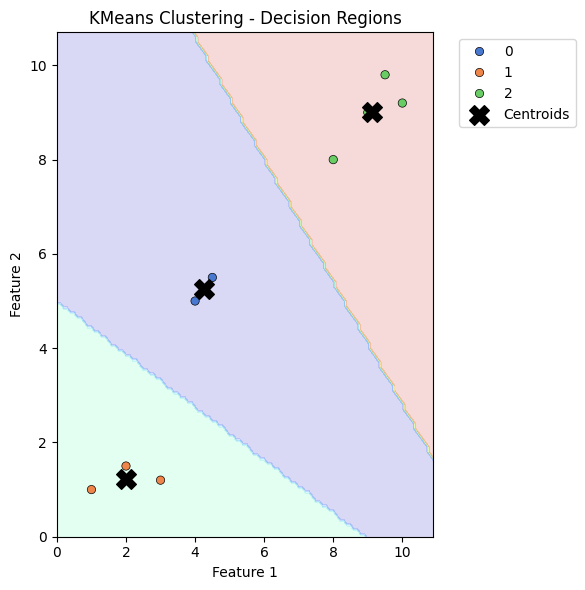

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# 🧪 Sample 2D Data (for cluster separation)
df = pd.DataFrame({
    'Feature1': [1, 2, 3, 8, 9, 10, 4, 4.5, 9.5],
    'Feature2': [1, 1.5, 1.2, 8, 9, 9.2, 5, 5.5, 9.8]
})

# 🔘 Fit KMeans
model = KMeans(n_clusters=3, random_state=42)
model.fit(df[['Feature1', 'Feature2']])
df['Cluster'] = model.labels_

# 🎯 Create Mesh Grid for decision boundary
X1, X2 = np.meshgrid(
    np.arange(start=df['Feature1'].min() - 1, stop=df['Feature1'].max() + 1, step=0.1),
    np.arange(start=df['Feature2'].min() - 1, stop=df['Feature2'].max() + 1, step=0.1)
)

# Predict cluster for each point in grid
grid_points = pd.DataFrame({'Feature1': X1.ravel(), 'Feature2': X2.ravel()})
grid_labels = model.predict(grid_points)

# 🖼️ Plot clusters and decision regions
fig, ax = plt.subplots(figsize=(6, 6))

# Contour regions
ax.contourf(X1, X2, grid_labels.reshape(X1.shape), alpha=0.15, cmap=plt.cm.jet)

# Scatter plot of real points
sns.scatterplot(data=df, x='Feature1', y='Feature2', hue='Cluster', palette='muted', ax=ax, edgecolor='black')

# Plot centroids
centroids = model.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')

plt.title("KMeans Clustering - Decision Regions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()


## 📈 9. Evaluation Metrics


### 📉 Regression Evaluation
#### ▸ R² Score
#### ▸ Mean Squared Error (MSE)
#### ▸ Mean Absolute Error (MAE)

### 📊 Classification Evaluation
#### ▸ Accuracy
#### ▸ Precision
#### ▸ Recall
#### ▸ F1 Score
#### ▸ Confusion Matrix
#### ▸ Classification Report
#### ▸ ROC AUC Score
#### ▸ Log Loss
#### ▸ Matthews Correlation Coefficient

## 📊 10. Visualizations

In [233]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 🧪 Example DataFrame
df = pd.DataFrame({
    'Selling_Price': [3.35, 4.75, 7.25, 2.85, 4.60],
    'Present_Price': [5.59, 9.54, 9.85, 4.15, 6.87],
    'Kms_Driven': [27000, 43000, 6900, 5200, 42450],
    'Fuel_Type': ['Petrol', 'Diesel', 'Petrol', 'Petrol', 'Diesel']
})


<Axes: xlabel='Selling_Price', ylabel='Count'>

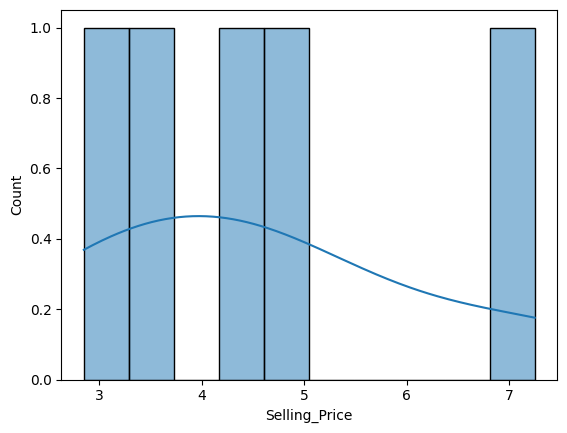

In [234]:
sns.histplot(data=df, x='Selling_Price', bins=10, kde=True)
# bins = number of bars
# kde=True adds a smoothed line over the bars


<Axes: xlabel='Fuel_Type', ylabel='Selling_Price'>

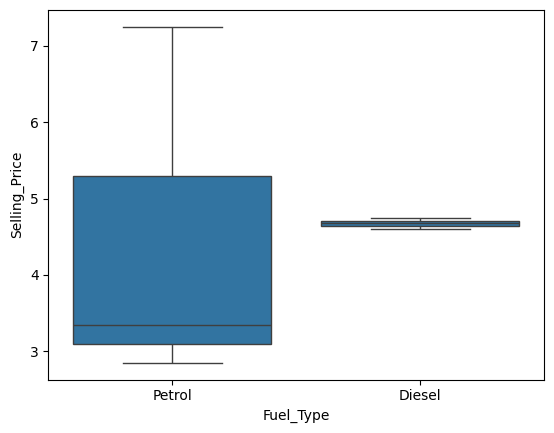

In [235]:
sns.boxplot(data=df, x='Fuel_Type', y='Selling_Price')
# orient='h' → horizontal
# hue='AnotherColumn' → split groups within box


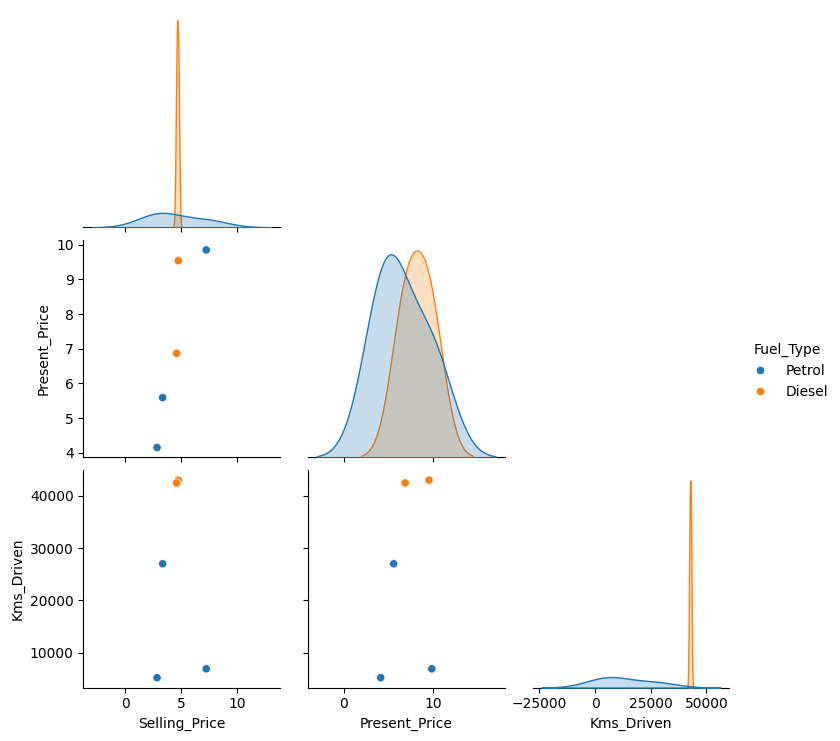

In [236]:
sns.pairplot(df, hue='Fuel_Type', corner=True)
# corner=True removes top-right mirrored plots
# diag_kind='kde' for smoothed diagonals


In [237]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# cmap options: 'viridis', 'YlGnBu', 'magma', etc.
# annot=True shows correlation values
# linewidths=0.5 adds space between cells


ValueError: could not convert string to float: 'Petrol'

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='Present_Price', ylabel='Selling_Price'>

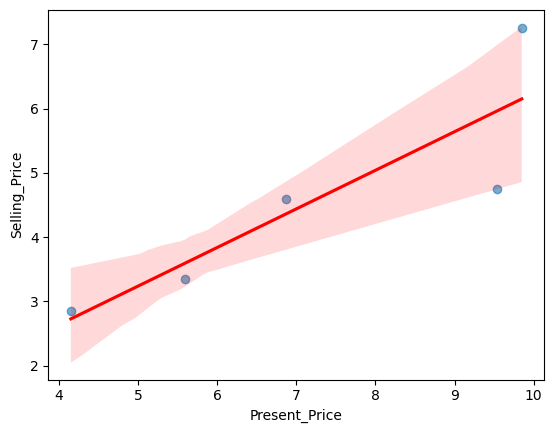

In [238]:
sns.regplot(data=df, x='Present_Price', y='Selling_Price', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
# scatter_kws and line_kws allow custom styling
# order=2 → polynomial fit


<Axes: xlabel='Present_Price', ylabel='Selling_Price'>

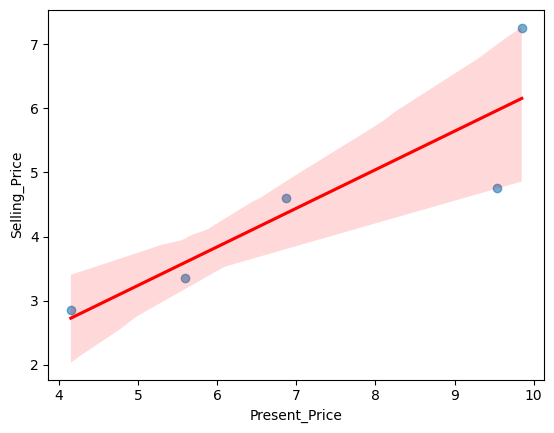

In [239]:
sns.regplot(data=df, x='Present_Price', y='Selling_Price', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
# scatter_kws and line_kws allow custom styling
# order=2 → polynomial fit


<Axes: xlabel='Present_Price', ylabel='Selling_Price'>

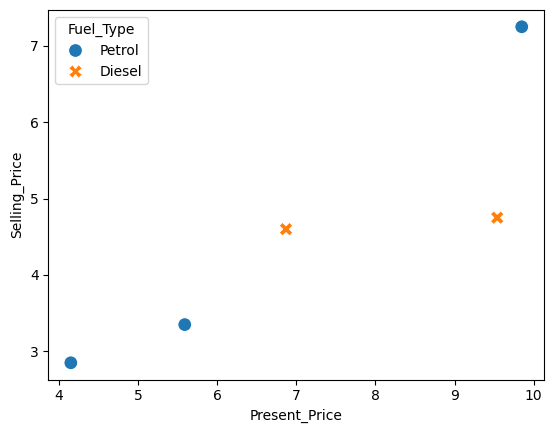

In [240]:
sns.scatterplot(data=df, x='Present_Price', y='Selling_Price', hue='Fuel_Type', style='Fuel_Type', s=100)
# hue = color by category
# style = marker shape
# s = marker size


<Axes: xlabel='Kms_Driven', ylabel='Density'>

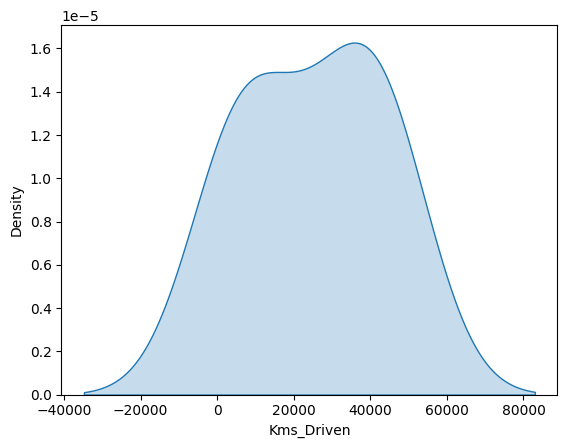

In [241]:
sns.kdeplot(data=df, x='Kms_Driven', fill=True)
# fill=True shades the area
# multiple='stack' or 'layer' if using hue


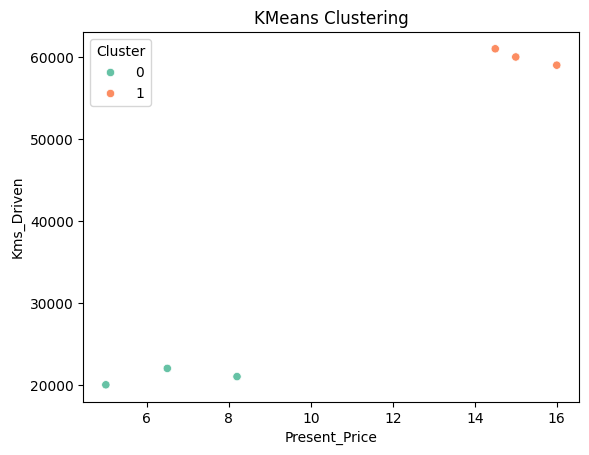

In [243]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
df = pd.DataFrame({
    'Present_Price': [5.0, 6.5, 8.2, 15.0, 14.5, 16.0],
    'Kms_Driven': [20000, 22000, 21000, 60000, 61000, 59000]
})

# Fit KMeans
model = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = model.fit_predict(df[['Present_Price', 'Kms_Driven']])

# Plot
sns.scatterplot(data=df, x='Present_Price', y='Kms_Driven', hue='Cluster', palette='Set2')
plt.title("KMeans Clustering")
plt.show()


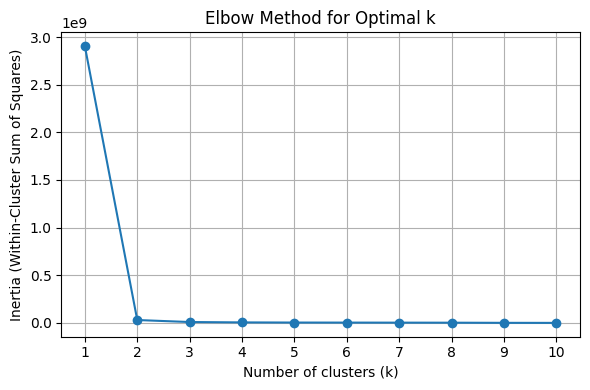

In [244]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 🧪 Sample Data
df = pd.DataFrame({
    'Present_Price': [5.0, 6.5, 8.2, 15.0, 14.5, 16.0, 4.2, 7.0, 5.5, 6.8],
    'Kms_Driven': [20000, 22000, 21000, 60000, 61000, 59000, 25000, 23000, 24000, 26000]
})

X = df[['Present_Price', 'Kms_Driven']]

# 📈 Try different values for k
inertias = []
K_range = range(1, 11)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertias.append(model.inertia_)

# 📊 Plot elbow curve
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.xticks(K_range)
plt.grid(True)
plt.tight_layout()
plt.show()



### ▸ Correlation Heatmap
### ▸ Histograms
### ▸ Boxplots
### ▸ Pairplots
### ▸ KDE plots
### ▸ Regression Plots
### ▸ Confusion Matrix Heatmap
### ▸ Decision Tree Plot
### ▸ K-Means Cluster Plot
### ▸ Elbow Method (KMeans)

## 💾 11. Saving and Loading Models

In [249]:
import joblib

# Save model
joblib.dump(model, 'kmeans_model.pkl')

# Save scaler (optional)
# joblib.dump(scaler, 'scaler.pkl')


['kmeans_model.pkl']

In [250]:
# Load model later
model_loaded = joblib.load('kmeans_model.pkl')

# Predict with loaded model
model_loaded.predict(new_data)


array([0], dtype=int32)

In [251]:
model_ann.save("ann_model.keras")  # OR: "ann_model.h5"


In [252]:
from keras.models import load_model

model_loaded = load_model("ann_model.keras")
model_loaded.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[0.]], dtype=float32)

### ▸ joblib (models, scalers, encoders)
### ▸ Keras `.save()` and `.load_model()`

## 🧪 12. Prediction on New Data

In [245]:
from sklearn.cluster import KMeans
import pandas as pd

# Original training data
df = pd.DataFrame({
    'Present_Price': [5.0, 6.5, 8.2, 15.0, 14.5, 16.0],
    'Kms_Driven': [20000, 22000, 21000, 60000, 61000, 59000]
})

X_train = df[['Present_Price', 'Kms_Driven']]

# Train model (use k from Elbow Method, e.g., k=2)
model = KMeans(n_clusters=2, random_state=42)
model.fit(X_train)


KMeans(n_clusters=2, random_state=42)

In [246]:
# New unseen data point(s)
new_data = pd.DataFrame({
    'Present_Price': [7.0],
    'Kms_Driven': [23000]
})


In [247]:
predicted_cluster = model.predict(new_data)
print(f"Predicted cluster: {predicted_cluster[0]}")


Predicted cluster: 0


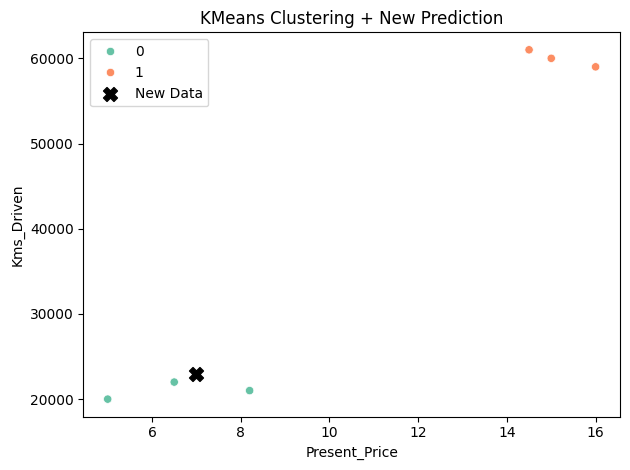

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add cluster labels to training data for plotting
df['Cluster'] = model.labels_

# Plot clusters
sns.scatterplot(data=df, x='Present_Price', y='Kms_Driven', hue='Cluster', palette='Set2')
plt.scatter(new_data['Present_Price'], new_data['Kms_Driven'], c='black', s=100, marker='X', label='New Data')
plt.title("KMeans Clustering + New Prediction")
plt.legend()
plt.tight_layout()
plt.show()


### ▸ Creating New Input
### ▸ Preprocessing (Scaling & Encoding)
### ▸ Reindexing to Match Training Columns
### ▸ Predicting

2025-04-25 07:55:05.472677: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745560506.125893    5336 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745560506.325393    5336 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745560508.148896    5336 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745560508.148927    5336 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745560508.148930    5336 computation_placer.cc:177] computation placer alr

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


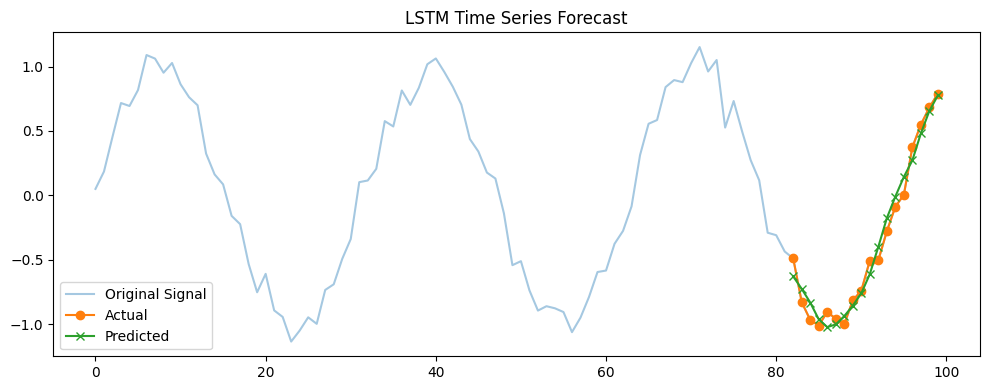

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# 1. Generate synthetic time series data
np.random.seed(42)
time = np.arange(100)
signal = np.sin(0.2 * time) + np.random.normal(scale=0.1, size=100)

# 2. Scale the data
scaler = MinMaxScaler()
signal_scaled = scaler.fit_transform(signal.reshape(-1, 1))

# 3. Convert to supervised format (windowed)
def create_windowed_dataset(series, window_size):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i + window_size])
        y.append(series[i + window_size])
    return np.array(X), np.array(y)

window_size = 10
X, y = create_windowed_dataset(signal_scaled, window_size)

# 4. Reshape for LSTM [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# 5. Train/test split
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# 6. Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))  # Single-step forecast

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), verbose=0)

# 7. Predict
y_pred = model.predict(X_test)

# 8. Inverse scale
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# 9. Plot
plt.figure(figsize=(10, 4))
plt.plot(range(len(signal)), signal, label='Original Signal', alpha=0.4)
plt.plot(range(len(signal) - len(y_test), len(signal)), y_test_inv, label='Actual', marker='o')
plt.plot(range(len(signal) - len(y_test), len(signal)), y_pred_inv, label='Predicted', marker='x')
plt.title('LSTM Time Series Forecast')
plt.legend()
plt.tight_layout()
plt.show()
